In [1]:
import numpy as np 
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
plt.style.use('sensitivity.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
def powerlaw(x,a,b): 
    return a*x**b

In [3]:
# 2020 Baseline sensitivity and discovery potential numbers 
Data = {}
Data['Baseline Sensitivity'] = {} 
Data['Baseline Sensitivity']['Livetime'] = np.array([1.0, 2.0, 5.0, 10.0])
Data['Baseline Sensitivity']['Halflife'] = np.array([4.246, 5.735, 9.054, 13.52])*1E27

Data['Baseline Discovery'] = {} 
Data['Baseline Discovery']['Livetime'] = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
Data['Baseline Discovery']['Halflife'] = np.array([1E-27, 0.318, 0.539, 0.714, 0.879, 0.99, 1.64, 2.74, 3.41, 4.13, 4.74, 5.48, 6.02, 6.56, 6.98, 7.40])*1E27
Data['Baseline Discovery']['Counts'] = np.array([0.0, 2.75, 3.25, 3.68, 3.98, 4.38, 5.24, 6.38, 7.71, 8.47, 9.27, 9.57, 10.18, 10.67, 11.28, 11.81])

In [4]:
# Curve fit to smooth out curves
popt1, pcov1 = curve_fit(f=powerlaw, 
                         xdata=Data['Baseline Sensitivity']['Livetime'][:3], 
                         ydata=Data['Baseline Sensitivity']['Halflife'][:3], 
                         p0=[1E27,1])

popt2, pcov2 = curve_fit(f=powerlaw, 
                         xdata=Data['Baseline Sensitivity']['Livetime'][2:], 
                         ydata=Data['Baseline Sensitivity']['Halflife'][2:], 
                         p0=[1E27,1])

popt3, pcov3 = curve_fit(f=powerlaw, 
                         xdata=Data['Baseline Discovery']['Livetime'][:7], 
                         ydata=Data['Baseline Discovery']['Halflife'][:7], 
                         p0=[1E27,1])

popt4, pcov4 = curve_fit(f=powerlaw, 
                         xdata=Data['Baseline Discovery']['Livetime'][6:], 
                         ydata=Data['Baseline Discovery']['Halflife'][6:], 
                         p0=[1E27,1])

xs1 = np.linspace(0, Data['Baseline Sensitivity']['Livetime'][2], 100000)
xs2 = np.linspace(Data['Baseline Sensitivity']['Livetime'][2], 10, 100000)
xs3 = np.linspace(0, Data['Baseline Discovery']['Livetime'][7], 100000)
xs4 = np.linspace(Data['Baseline Discovery']['Livetime'][7], 10, 100000)

/gpfs/slac/staas/fs1/g/exo/exo_data8/exo_data/users/akojamil/conda/sensitivity2020/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


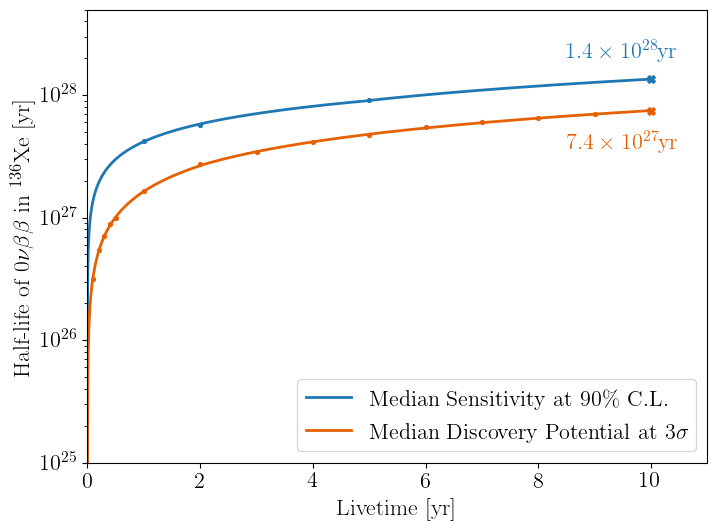

In [5]:
fig = plt.figure()
plt.xlabel('Livetime [yr]')
plt.ylabel('Half-life of $0\\nu\\beta\\beta$ in ${}^{136}\mathrm{Xe}$ [yr]')
plt.xlim(0.0,11)
plt.ylim(1E25,5E28)
plt.yscale('log')

# Scatter of individual results at different livetimes
plt.scatter(x=Data['Baseline Sensitivity']['Livetime'], 
            y=Data['Baseline Sensitivity']['Halflife'], 
            color=colors[0], label='', s=30, marker='.')
plt.scatter(x=Data['Baseline Discovery']['Livetime'], 
            y=Data['Baseline Discovery']['Halflife'], 
            label='', color=colors[1], s=30, marker='.')

plt.plot(xs1, powerlaw(xs1, *popt1), 
         label='Median Sensitivity at 90\% C.L.', 
         color=colors[0])
plt.plot(xs2, powerlaw(xs2, *popt2), 
         label='', 
         color=colors[0])

plt.plot(xs3, powerlaw(xs3, *popt3),
         label='Median Discovery Potential at $3\sigma$', 
         color=colors[1])
plt.plot(xs4, powerlaw(xs4, *popt4),
         label='', 
         color=colors[1])

# Add marker for half-life after 10 years
plt.scatter(x=Data['Baseline Sensitivity']['Livetime'][-1], 
            y=Data['Baseline Sensitivity']['Halflife'][-1], 
            label='', marker='X', color=colors[0], s=30)
plt.scatter(x=Data['Baseline Discovery']['Livetime'][-1], 
            y=Data['Baseline Discovery']['Halflife'][-1], 
            label='', marker='X', color=colors[1], s=30)

# Add half-life after 10 years as text
sens_base = Data['Baseline Sensitivity']['Halflife'][-1]/1E28
sens_exp = np.floor(np.log10(Data['Baseline Sensitivity']['Halflife'][-1])).astype(int)
dp_base = Data['Baseline Discovery']['Halflife'][-1]/1E27
dp_exp = np.floor(np.log10(Data['Baseline Discovery']['Halflife'][-1])).astype(int)

plt.text(8.5, Data['Baseline Sensitivity']['Halflife'][-1]*1.5, '${:1.1f} \\times 10^{{{}}} \mathrm{{yr}}$'.format(sens_base, sens_exp), color=colors[0], fontsize=16)
plt.text(8.5, Data['Baseline Discovery']['Halflife'][-1]/2.0, '${:1.1f} \\times 10^{{{}}} \mathrm{{yr}}$'.format(dp_base, dp_exp), color=colors[1], fontsize=16)

plt.legend(loc='lower right')
plt.savefig('sens_dp_vs_livetime.png')